In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Read the Data

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m')

In [3]:
ice_cream_heater_df = pd.read_csv('ice_cream_vs_heater.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

/tmp/ipykernel_230/3047748669.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  ice_cream_heater_df = pd.read_csv('ice_cream_vs_heater.csv', parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


In [4]:
ice_cream_heater_df = ice_cream_heater_df.asfreq(pd.infer_freq(ice_cream_heater_df.index))

In [12]:
ice_cream_heater_df

,heater,ice cream
Month,,
2004-01-01,27,13
2004-02-01,18,15
2004-03-01,14,16
2004-04-01,13,19
2004-05-01,13,21
...,...,...
2020-02-01,34,45
2020-03-01,25,44
2020-04-01,25,53


In [5]:
heater_series = ice_cream_heater_df.heater

In [6]:
heater_series

Month
2004-01-01    27
2004-02-01    18
2004-03-01    14
2004-04-01    13
2004-05-01    13
              ..
2020-02-01    34
2020-03-01    25
2020-04-01    25
2020-05-01    27
2020-06-01    24
Freq: MS, Name: heater, Length: 198, dtype: int64

In [7]:
def plot_series(series):
    plt.figure(figsize=(12,6))
    plt.plot(heater_series, color='red')
    plt.ylabel('Search Frequency for "Heater"', fontsize=16)

    for year in range(2004, 2021):
        plt.axvline(datetime(year,1,1), linestyle='--', color='k', alpha=0.5)

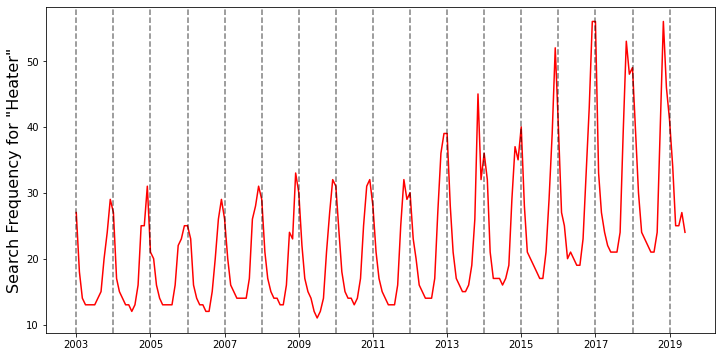

In [8]:
plot_series(heater_series)

# Normalize

In [9]:
avg, dev = heater_series.mean(), heater_series.std()

In [10]:
heater_series = (heater_series - avg) / dev

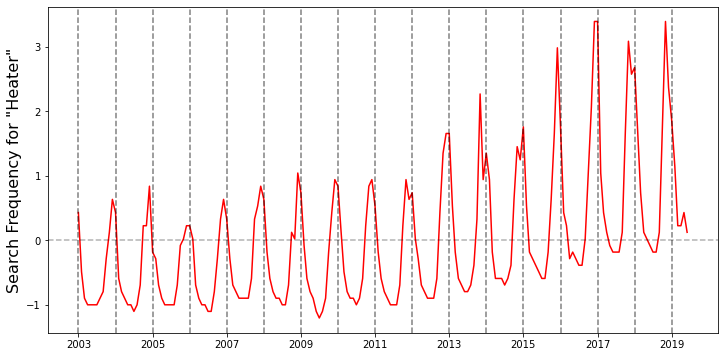

In [11]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Take First Difference to Remove Trend

趋势指的是时间序列中长期变化的方向和速度，通常可以用一条直线来表示。在金融领域，趋势也指股票价格、指数等长期的变化方向。

取一阶差分以去除趋势  时间序列= 趋势+ 残差+ 季节性

In [13]:
heater_series = heater_series.diff().dropna()

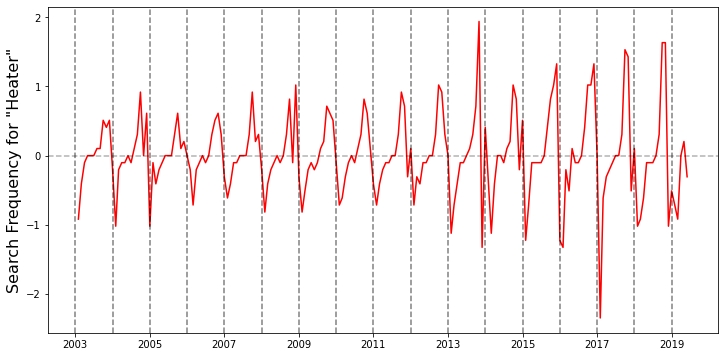

In [14]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Remove Increasing Volatility

通常时间序列分析包含四个主要成分：**趋势、季节性、循环性和随机性（或残差）**。在这个框架下，波动性（volatility）通常被视为循环性的一种形式，它描述了时间序列中波动的大小和频率。波动性通常是随机的，并且可以通过对时间序列进行分解来检查其他成分。因此，波动性可以看作是随机性中的一个方面，而随机性是由除趋势、季节性和循环性之外的因素引起的。

In [15]:
annual_volatility = heater_series.groupby(heater_series.index.year).std()

In [16]:
annual_volatility

Month
2004    0.415481
2005    0.474527
2006    0.400148
2007    0.359839
2008    0.396182
2009    0.499810
2010    0.459566
2011    0.443924
2012    0.471104
2013    0.503587
2014    0.855743
2015    0.569441
2016    0.719843
2017    0.830886
2018    0.987221
2019    0.892991
2020    0.426657
Name: heater, dtype: float64

In [17]:
heater_annual_vol = heater_series.index.map(lambda d: annual_volatility.loc[d.year])

In [18]:
heater_annual_vol

Float64Index([0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
              0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
              0.41548104705328837, 0.41548104705328837, 0.41548104705328837,
              0.41548104705328837,
              ...
               0.8929910269067829,  0.8929910269067829,  0.8929910269067829,
               0.8929910269067829, 0.42665652301411994, 0.42665652301411994,
              0.42665652301411994, 0.42665652301411994, 0.42665652301411994,
              0.42665652301411994],
             dtype='float64', name='Month', length=197)

In [19]:
heater_series = heater_series / heater_annual_vol

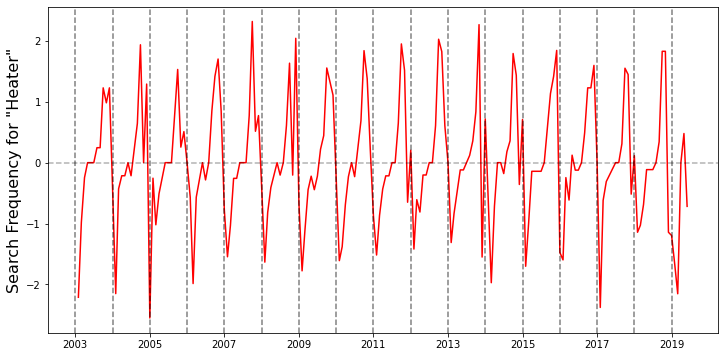

In [20]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)

# Remove Seasonality

In [21]:
month_avgs = heater_series.groupby(heater_series.index.month).mean()

In [22]:
month_avgs

Month
1    -0.428360
2    -1.483129
3    -1.063595
4    -0.442926
5    -0.121663
6    -0.128425
7    -0.107093
8     0.075720
9     0.544638
10    1.613170
11    1.183118
12    0.491641
dtype: float64

In [22]:
heater_month_avg = heater_series.index.map(lambda d: month_avgs.loc[d.month])

In [23]:
heater_month_avg

Float64Index([  -1.483129277176665,  -1.0635953355687688, -0.44292637101368243,
               -0.1216626157216479, -0.12842542811874375, -0.10709260508002617,
               0.07572031336904017,   0.5446384049209764,   1.6131699911888606,
                1.1831180641276993,
              ...
                0.5446384049209764,   1.6131699911888606,   1.1831180641276993,
                0.4916411242912191,  -0.4283597874466263,   -1.483129277176665,
               -1.0635953355687688, -0.44292637101368243,  -0.1216626157216479,
              -0.12842542811874375],
             dtype='float64', name='Month', length=197)

In [24]:
heater_series = heater_series - heater_month_avg

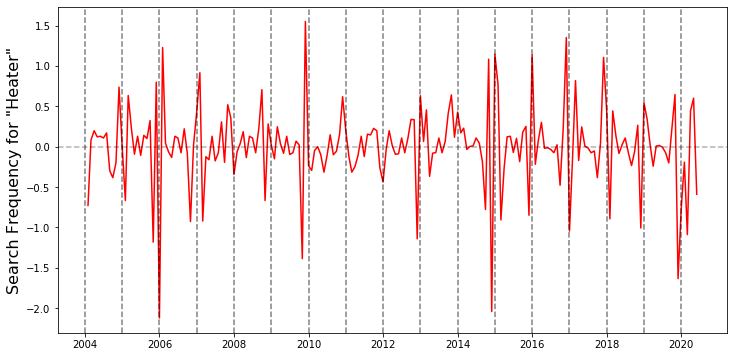

In [25]:
plot_series(heater_series)
plt.axhline(0, linestyle='--', color='k', alpha=0.3)